In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('index.csv')

print("Data Types:")
print(df.dtypes)

numeric_df = df.select_dtypes(include=[np.number])

if not numeric_df.empty:
    mean = numeric_df.mean()
    median = numeric_df.median()

    mode = numeric_df.mode().iloc[0]

    std_dev = numeric_df.std()
    variance = numeric_df.var()

    min_values = numeric_df.min()
    max_values = numeric_df.max()
    range_values = max_values - min_values

    percentiles = numeric_df.quantile([0.25, 0.5, 0.75])

Data Types:
date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object


In [3]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['day_name'] = df['datetime'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = pd.Categorical(df['day_name'], categories=days_order, ordered=True)

df.head(10)

,date,datetime,cash_type,card,money,coffee_name,hour,day,month,day_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10,1,3,Friday
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,1,3,Friday
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,1,3,Friday
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13,1,3,Friday
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13,1,3,Friday
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk,15,1,3,Friday
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate,16,1,3,Friday
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk,18,1,3,Friday
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa,19,1,3,Friday
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk,19,1,3,Friday


In [4]:
print("Mean: \n", mean)
print("Median: \n", median)
print("Mode: \n", mode)
print("Standard Deviation: \n", std_dev)
print("Variance: \n", variance)
print("Minimum: \n", min_values)
print("Maximum: \n", max_values)
print("Range: \n", range_values)
print("Percentiles: \n", percentiles)

Mean: 
 money    31.510212
dtype: float64
Median: 
 money    32.82
dtype: float64
Mode: 
 money    32.82
Name: 0, dtype: float64
Standard Deviation: 
 money    5.330878
dtype: float64
Variance: 
 money    28.418261
dtype: float64
Minimum: 
 money    18.12
dtype: float64
Maximum: 
 money    40.0
dtype: float64
Range: 
 money    21.88
dtype: float64
Percentiles: 
       money
0.25  27.92
0.50  32.82
0.75  37.72


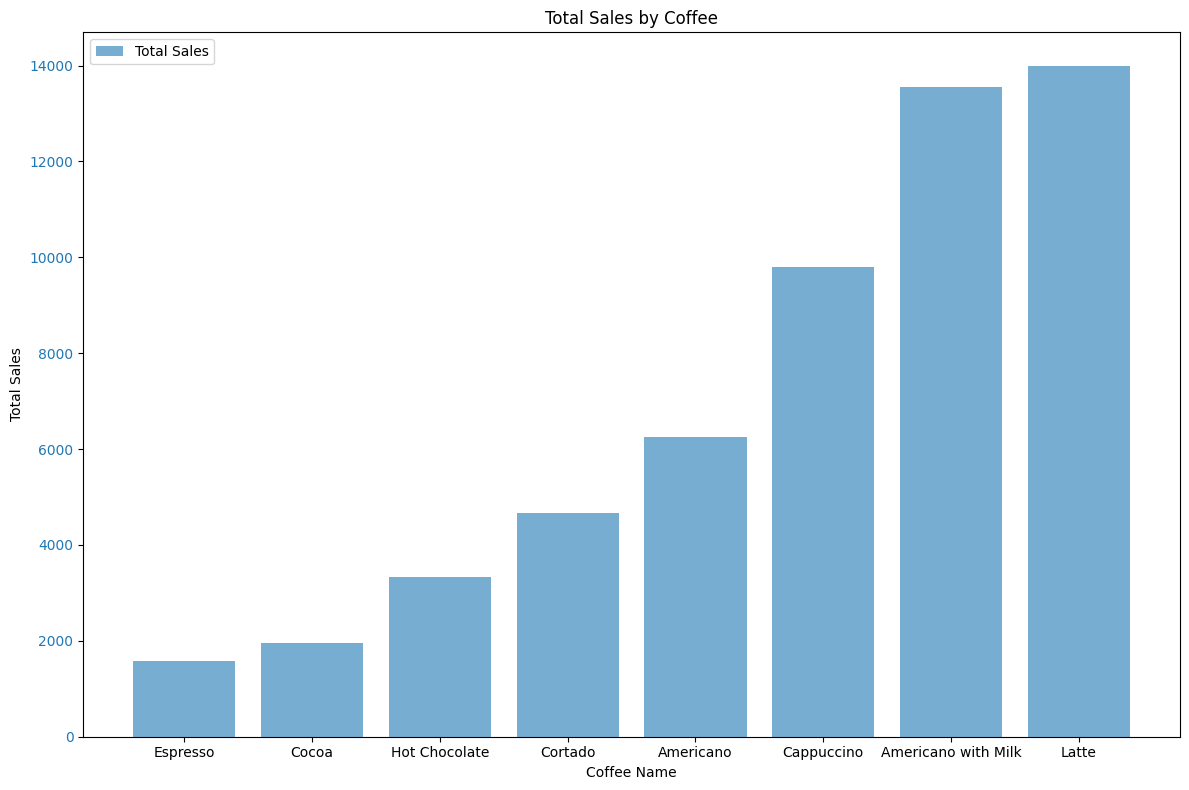

In [6]:
coffee_names = df['coffee_name'].unique()
total_sale_by_coffee = df.groupby('coffee_name')['money'].sum()
count_sale_by_coffee = df.groupby('coffee_name')['money'].count()

sorted_total_sale = total_sale_by_coffee.sort_values()
sorted_count_sale = count_sale_by_coffee.loc[sorted_total_sale.index]

fig, ax1 = plt.subplots(figsize=(12, 8))

color = 'tab:blue'
ax1.set_xlabel('Coffee Name')
ax1.set_ylabel('Total Sales')
ax1.bar(sorted_total_sale.index, sorted_total_sale, color = color, alpha=0.6, label='Total Sales')
ax1.tick_params(axis='y', labelcolor=color)

plt.title('Total Sales by Coffee')
ax1.legend(loc='upper left')   
#ax1.legend(loc='upper right')

fig.tight_layout()
plt.show()

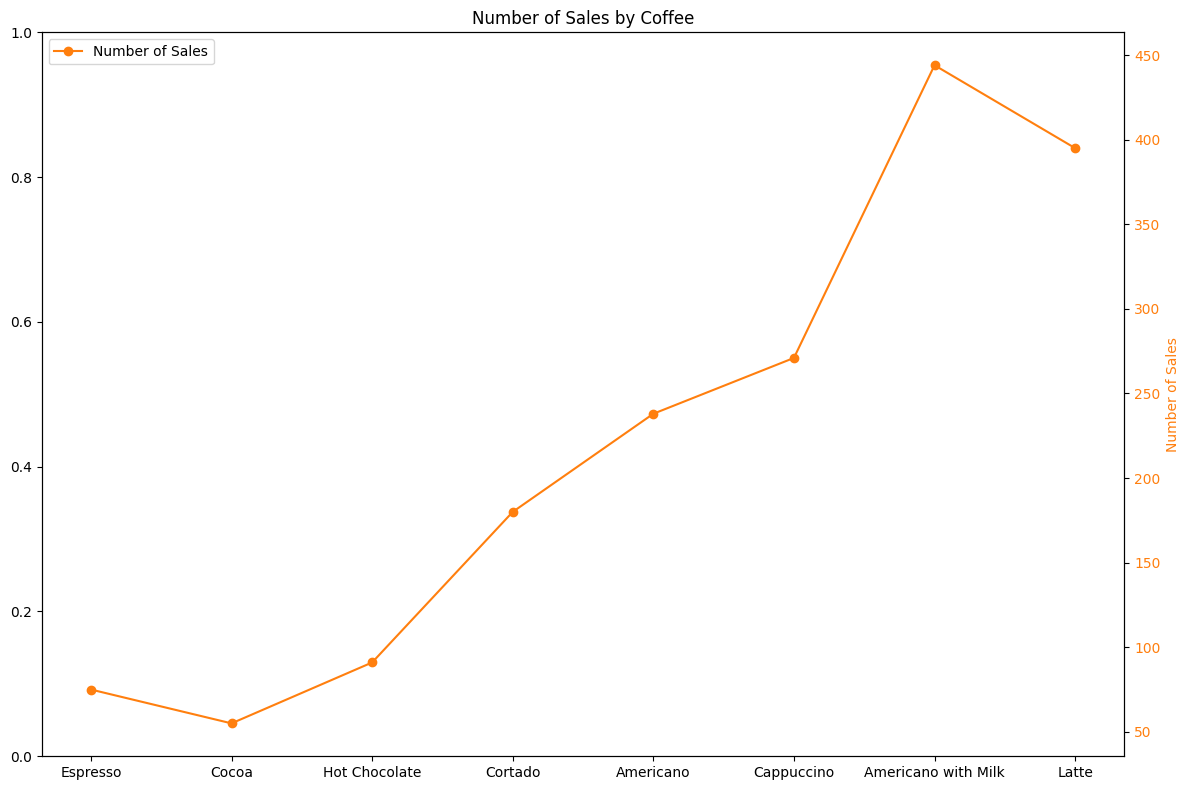

In [7]:
coffee_names = df['coffee_name'].unique()
total_sale_by_coffee = df.groupby('coffee_name')['money'].sum()
count_sale_by_coffee = df.groupby('coffee_name')['money'].count()

sorted_total_sale = total_sale_by_coffee.sort_values()
sorted_count_sale = count_sale_by_coffee.loc[sorted_total_sale.index]

fig, ax1 = plt.subplots(figsize=(12, 8))

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Number of Sales', color=color)
ax2.plot(sorted_count_sale.index, sorted_count_sale, color=color, marker='o', label='Number of Sales')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Number of Sales by Coffee')  
ax2.legend(loc='upper left')

fig.tight_layout()
plt.show()

C:\Users\DenFrost\AppData\Local\Temp\ipykernel_2328\3382525054.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sale_by_coffee_perday = df.groupby(['day_name', 'coffee_name'])['money'].count().unstack().fillna(0)


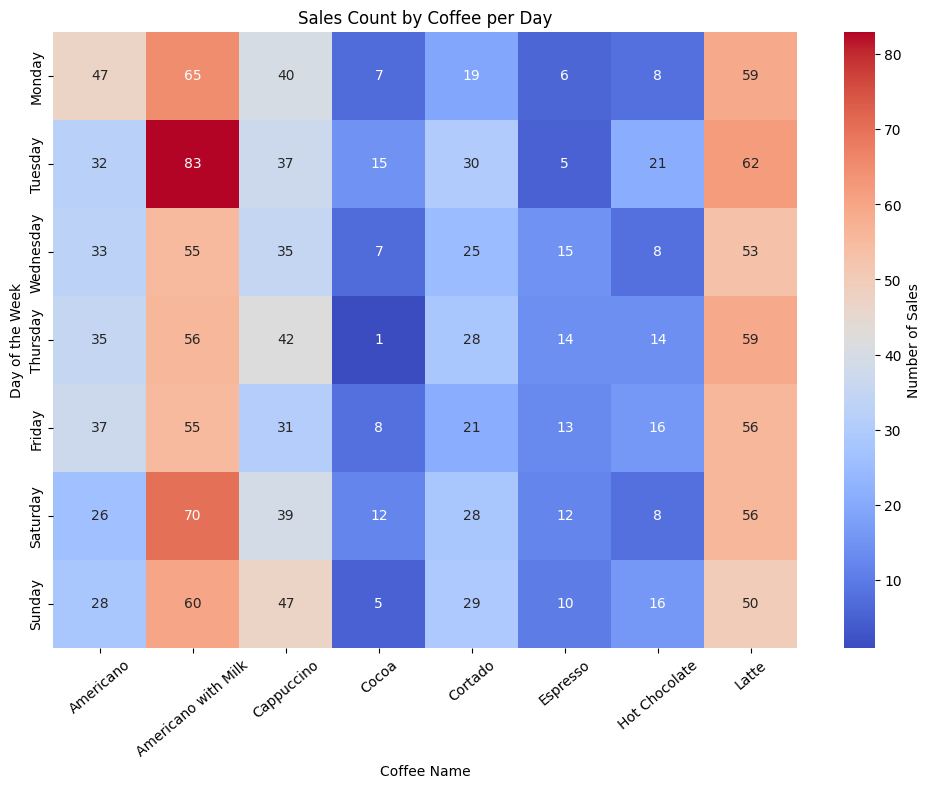

In [8]:
sale_by_coffee_perday = df.groupby(['day_name', 'coffee_name'])['money'].count().unstack().fillna(0)

# Plot sales by coffee per day using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sale_by_coffee_perday, cmap='coolwarm', annot=True, fmt='.0f', cbar_kws={'label': 'Number of Sales'})
plt.title('Sales Count by Coffee per Day')
plt.xlabel('Coffee Name')
plt.xticks(rotation=40)
plt.ylabel('Day of the Week')
plt.show()

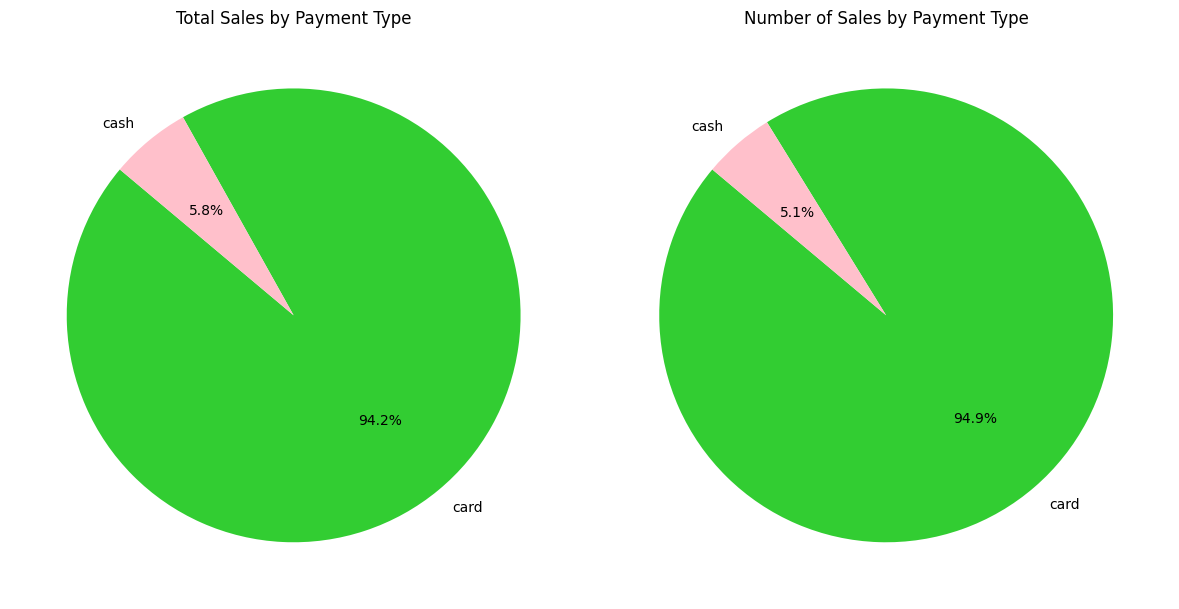

In [15]:
payment_type = df['cash_type'].unique()
total_sale_by_payment = df.groupby('cash_type')['money'].sum()
count_sale_by_payment = df.groupby('cash_type')['money'].count()


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(total_sale_by_payment, labels=total_sale_by_payment.index, autopct='%1.1f%%', startangle=140, colors=['limegreen','pink'])
plt.title('Total Sales by Payment Type')


plt.subplot(1, 2, 2) 
plt.pie(count_sale_by_payment, labels=count_sale_by_payment.index, autopct='%1.1f%%', startangle=140, colors=['limegreen','pink'])
plt.title('Number of Sales by Payment Type')

plt.tight_layout()
plt.show()